This notebook shows the efforts to coalign the EIT 195 image with the EIS spectra using the effective area of the EIT detector. 
Link to [Figure 1](#figure1). 

(The internal hyperlink only works on [nbviewer](https://nbviewer.org/github/yjzhu-solar/EIS_SUMER_PCH_Ti/blob/main/ipynb/check_eit_img.ipynb). Do not click when viewing the notebook on GitHub.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import sunpy
import sunpy.map
plt.style.use("science")
from matplotlib import patches
from matplotlib import rcParams
rcParams['axes.linewidth'] = 1.2
import scipy.io
import pandas as pd
from scipy import interpolate
import astropy.constants as const
from matplotlib.patches import Circle

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log10


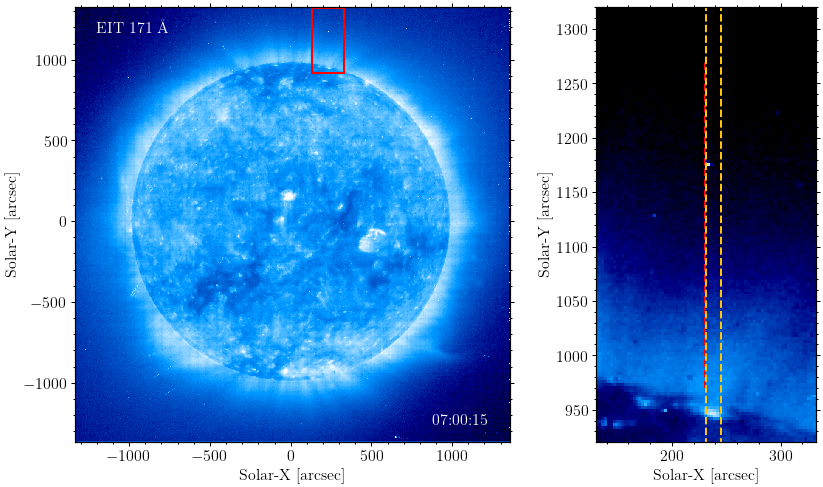

In [2]:
color_map = {171:plt.get_cmap("sohoeit171"),195:plt.get_cmap("sohoeit195"),
             284:plt.get_cmap("sohoeit284"),304:plt.get_cmap("sohoeit304")}

filename = "../save/eit_20071116_l1/eit_l1_20071116_070015.fits" 
sumer_ycen = 1119.81
sumer_xcen = 230.06
slit_color = {171:["red","#FFC408"]}
eis_ycen = 865.277
eis_xleft = 238.523 - 13.9776/2
eis_xright = 238.523 + 13.9776/2
with fits.open(filename) as hdul:
    #hdul.info()
    eit_img = hdul[0].data
    wvl = hdul[0].header["WAVELNTH"]
    xstart = (1-hdul[0].header["CRPIX1"])*hdul[0].header["CDELT1"]
    xend = (hdul[0].header["NAXIS1"]-hdul[0].header["CRPIX1"])*hdul[0].header["CDELT1"]
    ystart = (1-hdul[0].header["CRPIX2"])*hdul[0].header["CDELT2"]
    yend = (hdul[0].header["NAXIS2"]-hdul[0].header["CRPIX2"])*hdul[0].header["CDELT2"]
    xcoord = np.linspace(xstart,xend,hdul[0].header["NAXIS1"])
    ycoord = np.linspace(ystart,yend,hdul[0].header["NAXIS2"])
    
    vmax = np.log10(np.percentile(eit_img,99.97))
    
    fig = plt.subplots(figsize=(14,8))
    ax1 = plt.subplot2grid((1,3),(0,0),rowspan = 1,colspan = 2)
    ax1.pcolormesh(xcoord,ycoord,np.log10(eit_img),cmap=color_map[wvl],
                  vmax = vmax)
    ax1.text(0.05,0.95,"EIT "+str(wvl)+r" \mbox{\AA}",fontsize=16,color="white",
            transform=ax1.transAxes,ha="left",va="center")
    ax1.text(0.95,0.05,hdul[0].header["TIME-OBS"],fontsize=16,color="white",
            transform=ax1.transAxes,ha="right",va="center")
    
    ax2 = plt.subplot2grid((1,3),(0,2),rowspan = 1,colspan = 1)
    zoomin_xpix_start = np.argmin(np.abs(xcoord-sumer_xcen+100))
    zoomin_xpix_end = np.argmin(np.abs(xcoord-sumer_xcen-100))
    zoomin_ypix_start = np.argmin(np.abs(ycoord-sumer_ycen+200))
    zoomin_ypix_end = np.argmin(np.abs(ycoord-sumer_ycen-200))
    
    rec = patches.Rectangle((xcoord[zoomin_xpix_start],ycoord[zoomin_ypix_start]),
                           xcoord[zoomin_xpix_end]-xcoord[zoomin_xpix_start],
                           ycoord[zoomin_ypix_end]-ycoord[zoomin_ypix_start],
                           linewidth=2,edgecolor=slit_color[wvl][0],
                           facecolor="none")
    ax1.add_patch(rec)
    
    ax2.pcolormesh(xcoord[zoomin_xpix_start:zoomin_xpix_end+1],
                   ycoord[zoomin_ypix_start:zoomin_ypix_end+1],
                  np.log10(eit_img[zoomin_ypix_start:zoomin_ypix_end+1,
                                   zoomin_xpix_start:zoomin_xpix_end+1]),
                  cmap=color_map[wvl],vmax = vmax)
    
    ax2.plot([sumer_xcen,sumer_xcen],[sumer_ycen-299.2/2.,sumer_ycen+299.2/2.],
             color=slit_color[wvl][0],ls="--",lw=2,label="SUMER")
    
    ax2.plot([eis_xleft,eis_xleft],[eis_ycen-512./2.,sumer_ycen+512./2.],
             color=slit_color[wvl][1],ls="--",lw=2,label="EIS")
    
    ax2.plot([eis_xright,eis_xright],[eis_ycen-512./2.,sumer_ycen+512./2.],
             color=slit_color[wvl][1],ls="--",lw=2)
    
    for ax_ in (ax1,ax2):
        ax_.axis("scaled")
        ax_.set_xlabel("Solar-X [arcsec]",fontsize=16)
        ax_.set_ylabel("Solar-Y [arcsec]",fontsize=16)
        ax_.tick_params(labelsize=16)
        ax_.tick_params(which="major",width=1,length=4,direction="out")
        ax_.tick_params(which="minor",width=1,length=2,direction='out')
        
    ax2.set_ylim(ycoord[zoomin_ypix_start],ycoord[zoomin_ypix_end])
#hdul[0].header

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log10
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in log10


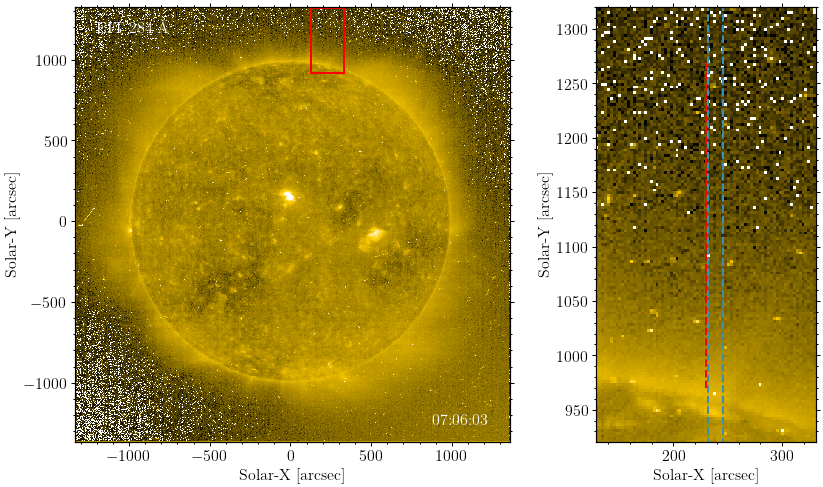

In [3]:
color_map = {171:plt.get_cmap("sohoeit171"),195:plt.get_cmap("sohoeit195"),
             284:plt.get_cmap("sohoeit284"),304:plt.get_cmap("sohoeit304")}

filename = "../save/eit_20071116_l1/eit_l1_20071116_070604.fits" 
sumer_ycen = 1119.81
sumer_xcen = 230.06
slit_color = {171:["red","#FFC408"],284:["red","#3A8FB7"],
              195:["red","#FFC408"],304:["white","#FFC408"]}
eis_ycen = 865.277
eis_xleft = 238.523 - 13.9776/2
eis_xright = 238.523 + 13.9776/2
with fits.open(filename) as hdul:
    #hdul.info()
    eit_img = hdul[0].data
    wvl = hdul[0].header["WAVELNTH"]
    xstart = (1-hdul[0].header["CRPIX1"])*hdul[0].header["CDELT1"]
    xend = (hdul[0].header["NAXIS1"]-hdul[0].header["CRPIX1"])*hdul[0].header["CDELT1"]
    ystart = (1-hdul[0].header["CRPIX2"])*hdul[0].header["CDELT2"]
    yend = (hdul[0].header["NAXIS2"]-hdul[0].header["CRPIX2"])*hdul[0].header["CDELT2"]
    xcoord = np.linspace(xstart,xend,hdul[0].header["NAXIS1"])
    ycoord = np.linspace(ystart,yend,hdul[0].header["NAXIS2"])
    
    vmax = np.log10(np.percentile(eit_img,99.97))
    
    fig = plt.subplots(figsize=(14,8))
    ax1 = plt.subplot2grid((1,3),(0,0),rowspan = 1,colspan = 2)
    ax1.pcolormesh(xcoord,ycoord,np.log10(eit_img),cmap=color_map[wvl],
                  vmax = vmax)
    ax1.text(0.05,0.95,"EIT "+str(wvl)+r" \mbox{\AA}",fontsize=16,color="white",
            transform=ax1.transAxes,ha="left",va="center")
    ax1.text(0.95,0.05,hdul[0].header["TIME-OBS"],fontsize=16,color="white",
            transform=ax1.transAxes,ha="right",va="center")
    
    ax2 = plt.subplot2grid((1,3),(0,2),rowspan = 1,colspan = 1)
    zoomin_xpix_start = np.argmin(np.abs(xcoord-sumer_xcen+100))
    zoomin_xpix_end = np.argmin(np.abs(xcoord-sumer_xcen-100))
    zoomin_ypix_start = np.argmin(np.abs(ycoord-sumer_ycen+200))
    zoomin_ypix_end = np.argmin(np.abs(ycoord-sumer_ycen-200))
    
    rec = patches.Rectangle((xcoord[zoomin_xpix_start],ycoord[zoomin_ypix_start]),
                           xcoord[zoomin_xpix_end]-xcoord[zoomin_xpix_start],
                           ycoord[zoomin_ypix_end]-ycoord[zoomin_ypix_start],
                           linewidth=2,edgecolor=slit_color[wvl][0],
                           facecolor="none")
    ax1.add_patch(rec)
    
    ax2.pcolormesh(xcoord[zoomin_xpix_start:zoomin_xpix_end+1],
                   ycoord[zoomin_ypix_start:zoomin_ypix_end+1],
                  np.log10(eit_img[zoomin_ypix_start:zoomin_ypix_end+1,
                                   zoomin_xpix_start:zoomin_xpix_end+1]),
                  cmap=color_map[wvl],vmax = vmax)
    
    ax2.plot([sumer_xcen,sumer_xcen],[sumer_ycen-299.2/2.,sumer_ycen+299.2/2.],
             color=slit_color[wvl][0],ls="--",lw=2,label="SUMER")
    
    ax2.plot([eis_xleft,eis_xleft],[eis_ycen-512./2.,sumer_ycen+512./2.],
             color=slit_color[wvl][1],ls="--",lw=2,label="EIS")
    
    ax2.plot([eis_xright,eis_xright],[eis_ycen-512./2.,sumer_ycen+512./2.],
             color=slit_color[wvl][1],ls="--",lw=2)
    
    for ax_ in (ax1,ax2):
        ax_.axis("scaled")
        ax_.set_xlabel("Solar-X [arcsec]",fontsize=16)
        ax_.set_ylabel("Solar-Y [arcsec]",fontsize=16)
        ax_.tick_params(labelsize=16)
        ax_.tick_params(which="major",width=1,length=4,direction="out")
        ax_.tick_params(which="minor",width=1,length=2,direction='out')
        
    ax2.set_ylim(ycoord[zoomin_ypix_start],ycoord[zoomin_ypix_end])
#hdul[0].header

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log10


SIMPLE  =                    T / Written by IDL:  Fri Oct  1 14:04:40 2021      
BITPIX  =                  -64 /  IEEE double precision floating point          
NAXIS   =                    2 /                                                
NAXIS1  =                  512 / Number of columns                              
NAXIS2  =                  512 / Number of rows                                 
                                                                                
DATE    = '2007-11-16'         / Date of file creation                          
TIME-OBS= '07:25:35'           /                                                
DATE-OBS= '2007-11-16T07:25:35.217' / UTC at spacecraft                         
                                                                                
ORIGIN  = 'Rocket Science'     / Rocket Science = NASA GSFC                     
DATASRC = 'LZ file           ' /                                                
TELESCOP= 'SOHO'            

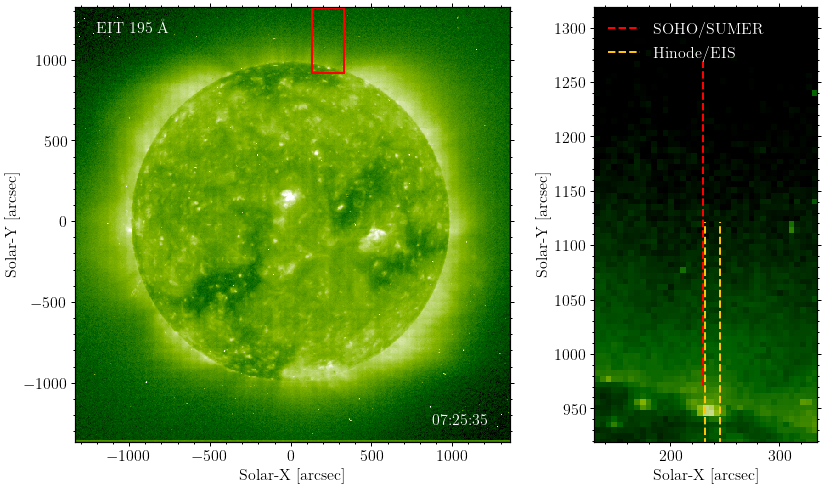

In [4]:
color_map = {171:plt.get_cmap("sohoeit171"),195:plt.get_cmap("sohoeit195"),
             284:plt.get_cmap("sohoeit284"),304:plt.get_cmap("sohoeit304")}

filename = "../save/eit_20071116_l1/eit_l1_20071116_072535.fits" 
sumer_ycen = 1119.81
sumer_xcen = 230.06
slit_color = {171:["red","#FFC408"],284:["red","#3A8FB7"],
              195:["red","#FFC408"],304:["white","#FFC408"]}
eis_ycen = 865.277
eis_xleft = 238.523 - 13.9776/2
eis_xright = 238.523 + 13.9776/2
with fits.open(filename) as hdul:
    #hdul.info()
    eit_img = hdul[0].data
    wvl = hdul[0].header["WAVELNTH"]
    xstart = (1-hdul[0].header["CRPIX1"])*hdul[0].header["CDELT1"]
    xend = (hdul[0].header["NAXIS1"]-hdul[0].header["CRPIX1"])*hdul[0].header["CDELT1"]
    ystart = (1-hdul[0].header["CRPIX2"])*hdul[0].header["CDELT2"]
    yend = (hdul[0].header["NAXIS2"]-hdul[0].header["CRPIX2"])*hdul[0].header["CDELT2"]
    xcoord = np.linspace(xstart,xend,hdul[0].header["NAXIS1"])
    ycoord = np.linspace(ystart,yend,hdul[0].header["NAXIS2"])
    
    vmax = np.log10(np.percentile(eit_img,99.97))
    
    fig = plt.subplots(figsize=(14,8))
    ax1 = plt.subplot2grid((1,3),(0,0),rowspan = 1,colspan = 2)
    ax1.pcolormesh(xcoord,ycoord,np.log10(eit_img),cmap=color_map[wvl],
                  vmax = vmax)
    ax1.text(0.05,0.95,"EIT "+str(wvl)+r" \mbox{\AA}",fontsize=16,color="white",
            transform=ax1.transAxes,ha="left",va="center")
    ax1.text(0.95,0.05,hdul[0].header["TIME-OBS"],fontsize=16,color="white",
            transform=ax1.transAxes,ha="right",va="center")
    
    ax2 = plt.subplot2grid((1,3),(0,2),rowspan = 1,colspan = 1)
    zoomin_xpix_start = np.argmin(np.abs(xcoord-sumer_xcen+100))
    zoomin_xpix_end = np.argmin(np.abs(xcoord-sumer_xcen-100))
    zoomin_ypix_start = np.argmin(np.abs(ycoord-sumer_ycen+200))
    zoomin_ypix_end = np.argmin(np.abs(ycoord-sumer_ycen-200))
    
    rec = patches.Rectangle((xcoord[zoomin_xpix_start],ycoord[zoomin_ypix_start]),
                           xcoord[zoomin_xpix_end]-xcoord[zoomin_xpix_start],
                           ycoord[zoomin_ypix_end]-ycoord[zoomin_ypix_start],
                           linewidth=2,edgecolor=slit_color[wvl][0],
                           facecolor="none")
    ax1.add_patch(rec)
    
    ax2.pcolormesh(xcoord[zoomin_xpix_start:zoomin_xpix_end+1],
                   ycoord[zoomin_ypix_start:zoomin_ypix_end+1],
                  np.log10(eit_img[zoomin_ypix_start:zoomin_ypix_end+1,
                                   zoomin_xpix_start:zoomin_xpix_end+1]),
                  cmap=color_map[wvl],vmax = vmax)
    
    ax2.plot([sumer_xcen,sumer_xcen],[sumer_ycen-299.2/2.,sumer_ycen+299.2/2.],
             color=slit_color[wvl][0],ls="--",lw=2,label="SOHO/SUMER")
    
    ax2.plot([eis_xleft,eis_xleft],[eis_ycen-512./2.,eis_ycen+512./2.],
             color=slit_color[wvl][1],ls="--",lw=2,label="Hinode/EIS")
    
    ax2.plot([eis_xright,eis_xright],[eis_ycen-512./2.,eis_ycen+512./2.],
             color=slit_color[wvl][1],ls="--",lw=2)
    
    ax2.legend(loc="upper left",frameon=False,fontsize=16,labelcolor="white")
    
    for ax_ in (ax1,ax2):
        ax_.axis("scaled")
        ax_.set_xlabel("Solar-X [arcsec]",fontsize=16)
        ax_.set_ylabel("Solar-Y [arcsec]",fontsize=16)
        ax_.tick_params(labelsize=16)
        ax_.tick_params(which="major",width=1,length=4,direction="out")
        ax_.tick_params(which="minor",width=1,length=2,direction='out')
        
    ax2.set_ylim(ycoord[zoomin_ypix_start],ycoord[zoomin_ypix_end])
hdul[0].header

In [5]:
eis_data_set = scipy.io.readsav("../save/new_lvl1_offset_limb_1116_northpole_tilt_cor_l1_20071116_07262.sav",verbose=False)

In [6]:
eis_wvl =  eis_data_set["wvl"]
eis_img = eis_data_set["new_data_offset"]

In [7]:
eis_img.shape

(7, 534, 4096)

In [8]:
eit_195_index_left = np.argmin(np.abs(eis_wvl-175)) + 1
eit_195_index_right = np.argmin(np.abs(eis_wvl-210))
eit_195_window_wvl = eis_wvl[eit_195_index_left:eit_195_index_right]
eit_195_window_eis_img = eis_img[:,:,eit_195_index_left:eit_195_index_right]

In [9]:
c = const.c.cgs.value
hplanck = const.h.cgs.value
photon2erg = hplanck*c/eit_195_window_wvl
eit_195_window_eis_img_photon = eit_195_window_eis_img/photon2erg

In [10]:
eit_al1_Aeff_list = pd.read_fwf("../raw_data/soho_eit_filter/eit_195_al1.txt",
                                skiprows=8,names=['wvl','Aeff'],widths=[10,20],encoding='utf-8',index_col=False,
                                dtype = {'':np.float64})
eit_al1_Aeff_list

,wvl,Aeff
0,175.0,2.750500e-14
1,175.5,3.098900e-14
2,176.0,3.561100e-14
3,176.5,4.183400e-14
4,177.0,5.045600e-14
...,...,...
75,212.5,4.984900e-14
76,213.0,4.663600e-14
77,213.5,4.372700e-14
78,214.0,4.108500e-14


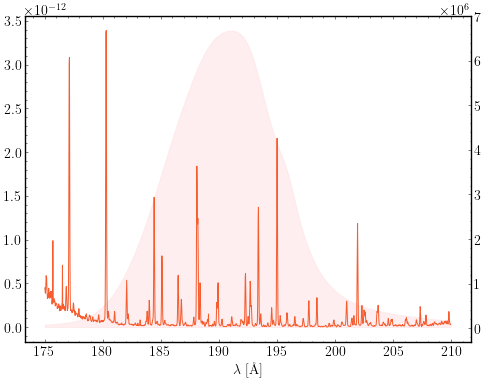

In [11]:
eit_195_al1_tck = interpolate.splrep(eit_al1_Aeff_list["wvl"].values,
                                     eit_al1_Aeff_list["Aeff"].values, s=0)

eit_195_eis_Aeff = interpolate.splev(eit_195_window_wvl, eit_195_al1_tck, der=0)

fig, ax = plt.subplots(figsize=(8,6))
#ax.scatter(eit_al1_Aeff_list["wvl"],eit_al1_Aeff_list["Aeff"])
ax.fill_between(eit_195_window_wvl,0,eit_195_eis_Aeff,color="#FEDFE1",
               alpha=0.5)

ax_eis = ax.twinx()
ax_eis.plot(eit_195_window_wvl,np.sum(eit_195_window_eis_img,axis=(0,1)),
           color="#F75C2F")

for ax_ in (ax,ax_eis):
    ax_.tick_params(labelsize=14)
    ax_.set_xlabel(r"$\lambda$ [\mbox{\AA}]",fontsize=14)
    ax_.yaxis.get_offset_text().set_fontsize(14)

In [12]:
eit_195_window_eis_img_syn = np.sum(eit_195_window_eis_img_photon*eit_195_eis_Aeff,axis=2)

In [13]:
eit_195_window_eis_img_syn.shape

(7, 534)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10


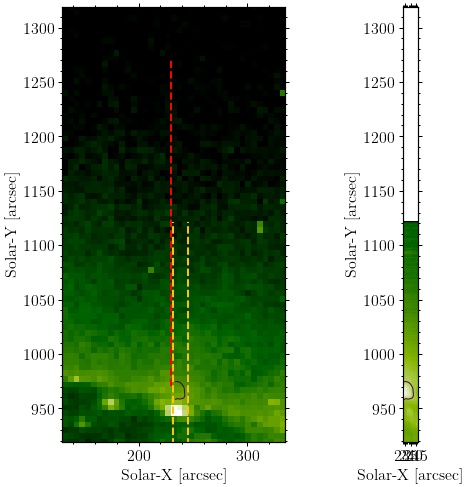

In [14]:
fig = plt.subplots(figsize=(8,8))
ax1 = plt.subplot2grid((1,3),(0,0),rowspan = 1,colspan = 2)
ax2 = plt.subplot2grid((1,3),(0,2),rowspan = 1,colspan = 2)

ax1.pcolormesh(xcoord[zoomin_xpix_start:zoomin_xpix_end+1],
               ycoord[zoomin_ypix_start:zoomin_ypix_end+1],
              np.log10(eit_img[zoomin_ypix_start:zoomin_ypix_end+1,
                               zoomin_xpix_start:zoomin_xpix_end+1]),
              cmap=color_map[wvl])

ax1.plot([sumer_xcen,sumer_xcen],[sumer_ycen-299.2/2.,sumer_ycen+299.2/2.],
         color=slit_color[wvl][0],ls="--",lw=2,label="SUMER")

ax1.plot([eis_xleft,eis_xleft],[eis_ycen-512./2.,eis_ycen+512./2.],
         color=slit_color[wvl][1],ls="--",lw=2,label="EIS")

ax1.plot([eis_xright,eis_xright],[eis_ycen-512./2.,eis_ycen+512./2.],
         color=slit_color[wvl][1],ls="--",lw=2)
         
xcoord_eis = np.array([245.512,243.515,241.441,239.450,237.447,235.450,233.475])
ycoord_eis = np.linspace(eis_ycen-257.5,eis_ycen-257.5+533,534)

ax2.pcolormesh(xcoord_eis,
               ycoord_eis,
              np.log10(eit_195_window_eis_img_syn.T),
              cmap=color_map[wvl])




ax1.contour(xcoord_eis,ycoord_eis,eit_195_window_eis_img_syn.T,
            levels=[np.percentile(eit_195_window_eis_img_syn.T,95)])

ax2.contour(xcoord_eis,ycoord_eis,eit_195_window_eis_img_syn.T,
            levels=[np.percentile(eit_195_window_eis_img_syn.T,95)])

for ax_ in (ax1,ax2):
    ax_.axis("scaled")
    ax_.set_xlabel("Solar-X [arcsec]",fontsize=16)
    ax_.set_ylabel("Solar-Y [arcsec]",fontsize=16)
    ax_.tick_params(labelsize=16)
    ax_.tick_params(which="major",width=1,length=4,direction="out")
    ax_.tick_params(which="minor",width=1,length=2,direction='out')
    ax_.set_ylim(ycoord[zoomin_ypix_start],ycoord[zoomin_ypix_end])
    

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10


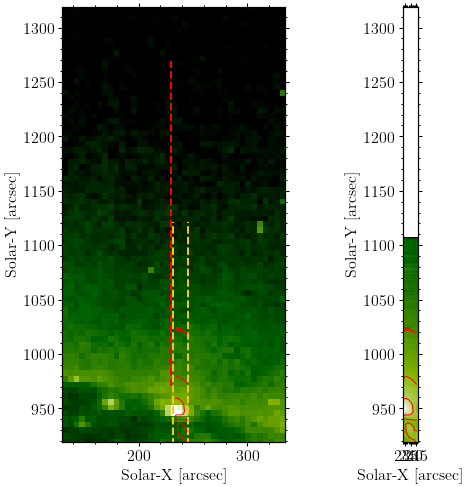

In [15]:
fig = plt.subplots(figsize=(8,8))
ax1 = plt.subplot2grid((1,3),(0,0),rowspan = 1,colspan = 2)
ax2 = plt.subplot2grid((1,3),(0,2),rowspan = 1,colspan = 2)

ax1.pcolormesh(xcoord[zoomin_xpix_start:zoomin_xpix_end+1],
               ycoord[zoomin_ypix_start:zoomin_ypix_end+1],
              np.log10(eit_img[zoomin_ypix_start:zoomin_ypix_end+1,
                               zoomin_xpix_start:zoomin_xpix_end+1]),
              cmap=color_map[wvl])

ax1.plot([sumer_xcen,sumer_xcen],[sumer_ycen-299.2/2.,sumer_ycen+299.2/2.],
         color=slit_color[wvl][0],ls="--",lw=2,label="SUMER")

ax1.plot([eis_xleft,eis_xleft],[eis_ycen-512./2.,eis_ycen+512./2.],
         color=slit_color[wvl][1],ls="--",lw=2,label="EIS")

ax1.plot([eis_xright,eis_xright],[eis_ycen-512./2.,eis_ycen+512./2.],
         color=slit_color[wvl][1],ls="--",lw=2)


xcoord_eis = np.array([245.512,243.515,241.441,239.450,237.447,235.450,233.475])
ycoord_eis_new = np.linspace(eis_ycen-257.5,eis_ycen-257.5+533,534)-15

ax2.pcolormesh(xcoord_eis,
               ycoord_eis_new,
              np.log10(eit_195_window_eis_img_syn.T),
              cmap=color_map[wvl])

ax1.contour(xcoord_eis,ycoord_eis_new,eit_195_window_eis_img_syn.T,
            levels=np.percentile(eit_195_window_eis_img_syn.T,[20,50,98]),colors='red')

ax2.contour(xcoord_eis,ycoord_eis_new,eit_195_window_eis_img_syn.T,
            levels=np.percentile(eit_195_window_eis_img_syn.T,[20,50,98]),colors='red')

for ax_ in (ax1,ax2):
    ax_.axis("scaled")
    ax_.set_xlabel("Solar-X [arcsec]",fontsize=16)
    ax_.set_ylabel("Solar-Y [arcsec]",fontsize=16)
    ax_.tick_params(labelsize=16)
    ax_.tick_params(which="major",width=1,length=4,direction="out")
    ax_.tick_params(which="minor",width=1,length=2,direction='out')
    ax_.set_ylim(ycoord[zoomin_ypix_start],ycoord[zoomin_ypix_end])

    

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10


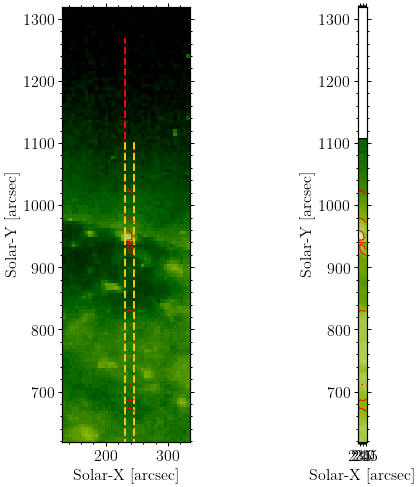

In [16]:
fig = plt.subplots(figsize=(8,8))
ax1 = plt.subplot2grid((1,3),(0,0),rowspan = 1,colspan = 2)
ax2 = plt.subplot2grid((1,3),(0,2),rowspan = 1,colspan = 2)

ax1.pcolormesh(xcoord[zoomin_xpix_start:zoomin_xpix_end+1],
               ycoord,
              np.log10(eit_img[:,
                               zoomin_xpix_start:zoomin_xpix_end+1]),
              cmap=color_map[wvl])

ax1.plot([sumer_xcen,sumer_xcen],[sumer_ycen-299.2/2.,sumer_ycen+299.2/2.],
         color=slit_color[wvl][0],ls="--",lw=2,label="SUMER")

ax1.plot([eis_xleft,eis_xleft],[eis_ycen-512./2.-15.,eis_ycen+512./2.-15.],
         color=slit_color[wvl][1],ls="--",lw=2,label="EIS")

ax1.plot([eis_xright,eis_xright],[eis_ycen-512./2.-15.,eis_ycen+512./2.-15.],
         color=slit_color[wvl][1],ls="--",lw=2)


xcoord_eis = np.array([245.512,243.515,241.441,239.450,237.447,235.450,233.475])
ycoord_eis_new = np.linspace(eis_ycen-257.5,eis_ycen-257.5+533,534)-15

ax2.pcolormesh(xcoord_eis,
               ycoord_eis_new,
              np.log10(eit_195_window_eis_img_syn.T),
              cmap=color_map[wvl])

ax1.contour(xcoord_eis,ycoord_eis_new,eit_195_window_eis_img_syn.T,
            levels=np.percentile(eit_195_window_eis_img_syn.T,[20,50,98]),colors='red')

ax2.contour(xcoord_eis,ycoord_eis_new,eit_195_window_eis_img_syn.T,
            levels=np.percentile(eit_195_window_eis_img_syn.T,[20,50,98]),colors='red')

for ax_ in (ax1,ax2):
    ax_.axis("scaled")
    ax_.set_xlabel("Solar-X [arcsec]",fontsize=16)
    ax_.set_ylabel("Solar-Y [arcsec]",fontsize=16)
    ax_.tick_params(labelsize=16)
    ax_.tick_params(which="major",width=1,length=4,direction="out")
    ax_.tick_params(which="minor",width=1,length=2,direction='out')
    ax_.set_ylim(ycoord[zoomin_ypix_start]-300,ycoord[zoomin_ypix_end])

    

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10


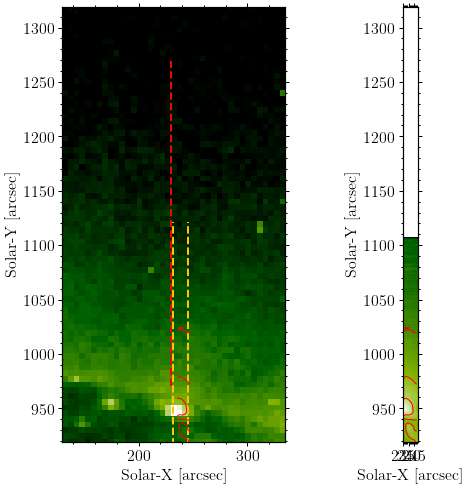

In [17]:
fig = plt.subplots(figsize=(8,8))
ax1 = plt.subplot2grid((1,3),(0,0),rowspan = 1,colspan = 2)
ax2 = plt.subplot2grid((1,3),(0,2),rowspan = 1,colspan = 2)

ax1.pcolormesh(xcoord[zoomin_xpix_start:zoomin_xpix_end+1],
               ycoord[zoomin_ypix_start:zoomin_ypix_end+1],
              np.log10(eit_img[zoomin_ypix_start:zoomin_ypix_end+1,
                               zoomin_xpix_start:zoomin_xpix_end+1]),
              cmap=color_map[wvl])

ax1.plot([sumer_xcen,sumer_xcen],[sumer_ycen-299.2/2.,sumer_ycen+299.2/2.],
         color=slit_color[wvl][0],ls="--",lw=2,label="SUMER")

ax1.plot([eis_xleft,eis_xleft],[eis_ycen-512./2.,eis_ycen+512./2.],
         color=slit_color[wvl][1],ls="--",lw=2,label="EIS")

ax1.plot([eis_xright,eis_xright],[eis_ycen-512./2.,eis_ycen+512./2.],
         color=slit_color[wvl][1],ls="--",lw=2)


xcoord_eis_new = np.array([245.512,243.515,241.441,239.450,237.447,235.450,233.475])+2
ycoord_eis_new = np.linspace(eis_ycen-257.5,eis_ycen-257.5+533,534)-15

ax2.pcolormesh(xcoord_eis_new,
               ycoord_eis_new,
              np.log10(eit_195_window_eis_img_syn.T),
              cmap=color_map[wvl])

ax1.contour(xcoord_eis_new,ycoord_eis_new,eit_195_window_eis_img_syn.T,
            levels=np.percentile(eit_195_window_eis_img_syn.T,[20,50,98]),colors='red')

ax2.contour(xcoord_eis_new,ycoord_eis_new,eit_195_window_eis_img_syn.T,
            levels=np.percentile(eit_195_window_eis_img_syn.T,[20,50,98]),colors='red')

for ax_ in (ax1,ax2):
    ax_.axis("scaled")
    ax_.set_xlabel("Solar-X [arcsec]",fontsize=16)
    ax_.set_ylabel("Solar-Y [arcsec]",fontsize=16)
    ax_.tick_params(labelsize=16)
    ax_.tick_params(which="major",width=1,length=4,direction="out")
    ax_.tick_params(which="minor",width=1,length=2,direction='out')
    ax_.set_ylim(ycoord[zoomin_ypix_start],ycoord[zoomin_ypix_end])

### Figure 1
<a id='figure1'></a>

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log10
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


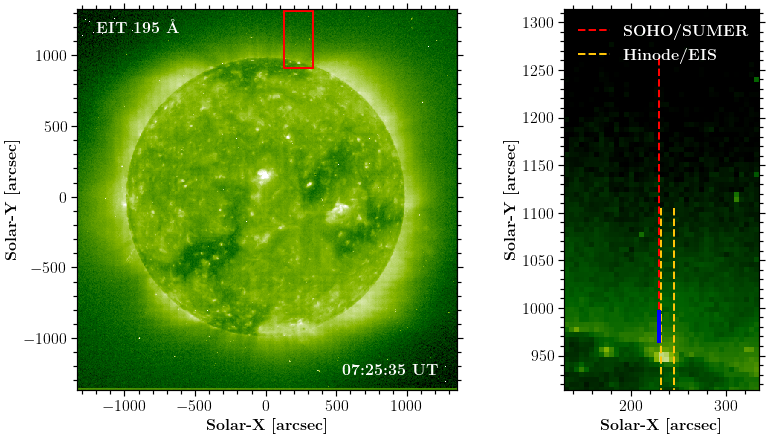

In [18]:
color_map = {171:plt.get_cmap("sohoeit171"),195:plt.get_cmap("sohoeit195"),
             284:plt.get_cmap("sohoeit284"),304:plt.get_cmap("sohoeit304")}

filename = "../save/eit_20071116_l1/eit_l1_20071116_072535.fits" 
sumer_ycen = 1119.81 - 5
sumer_xcen = 230.06
slit_color = {171:["red","#FFC408"],284:["red","#3A8FB7"],
              195:["red","#FFC408"],304:["white","#FFC408"]}
eis_ycen = 865.277 - 15
eis_xleft = 238.523 - 13.9776/2
eis_xright = 238.523 + 13.9776/2
with fits.open(filename) as hdul:
    #hdul.info()
    eit_img = hdul[0].data
    wvl = hdul[0].header["WAVELNTH"]
    xstart = (1-hdul[0].header["CRPIX1"])*hdul[0].header["CDELT1"]
    xend = (hdul[0].header["NAXIS1"]-hdul[0].header["CRPIX1"])*hdul[0].header["CDELT1"]
    ystart = (1-hdul[0].header["CRPIX2"])*hdul[0].header["CDELT2"]
    yend = (hdul[0].header["NAXIS2"]-hdul[0].header["CRPIX2"])*hdul[0].header["CDELT2"]
    xcoord = np.linspace(xstart,xend,hdul[0].header["NAXIS1"])
    ycoord = np.linspace(ystart,yend,hdul[0].header["NAXIS2"])
    
    vmax = np.log10(np.percentile(eit_img,99.97))
    
    fig = plt.subplots(figsize=(14,7),constrained_layout=True)
    ax1 = plt.subplot2grid((1,3),(0,0),rowspan = 1,colspan = 2)
    ax1.pcolormesh(xcoord,ycoord,np.log10(eit_img),cmap=color_map[wvl],
                  vmax = vmax,shading="auto",rasterized=True)
    ax1.text(0.05,0.95,r"\textbf{EIT "+str(wvl)+r" \mbox{\AA}}",fontsize=16,color="white",
            transform=ax1.transAxes,ha="left",va="center")
    ax1.text(0.95,0.05,r"\textbf{" + hdul[0].header["TIME-OBS"]+r" UT}",fontsize=16,color="white",
            transform=ax1.transAxes,ha="right",va="center")
    
    ax2 = plt.subplot2grid((1,3),(0,2),rowspan = 1,colspan = 1)
    zoomin_xpix_start = np.argmin(np.abs(xcoord-sumer_xcen+100))
    zoomin_xpix_end = np.argmin(np.abs(xcoord-sumer_xcen-100))
    zoomin_ypix_start = np.argmin(np.abs(ycoord-sumer_ycen+200))
    zoomin_ypix_end = np.argmin(np.abs(ycoord-sumer_ycen-200))
    
    rec = patches.Rectangle((xcoord[zoomin_xpix_start],ycoord[zoomin_ypix_start]),
                           xcoord[zoomin_xpix_end]-xcoord[zoomin_xpix_start],
                           ycoord[zoomin_ypix_end]-ycoord[zoomin_ypix_start],
                           linewidth=2,edgecolor=slit_color[wvl][0],
                           facecolor="none")
    ax1.add_patch(rec)
    
    ax2.pcolormesh(xcoord[zoomin_xpix_start:zoomin_xpix_end+1],
                   ycoord[zoomin_ypix_start:zoomin_ypix_end+1],
                  np.log10(eit_img[zoomin_ypix_start:zoomin_ypix_end+1,
                                   zoomin_xpix_start:zoomin_xpix_end+1]),
                  cmap=color_map[wvl],vmax = vmax,shading="auto",rasterized=True)
    
    ax2.plot([sumer_xcen,sumer_xcen],[sumer_ycen-299.2/2.,sumer_ycen+299.2/2.],
             color=slit_color[wvl][0],ls="--",lw=2,label=r"\textbf{SOHO/SUMER}")
    
    ax2.plot([eis_xleft,eis_xleft],[eis_ycen-512./2.,eis_ycen+512./2.],
             color=slit_color[wvl][1],ls="--",lw=2,label=r"\textbf{Hinode/EIS}")
    
    ax2.plot([eis_xright,eis_xright],[eis_ycen-512./2.,eis_ycen+512./2.],
             color=slit_color[wvl][1],ls="--",lw=2)

    ax2.plot([sumer_xcen,sumer_xcen],[sumer_ycen-299.2/2.,sumer_ycen-299.2/2.+30],
             color="blue",ls="-",lw=4)


    
    ax2.legend(loc="upper left",frameon=False,fontsize=16,labelcolor="white")
    
    for ax_ in (ax1,ax2):
        ax_.axis("scaled")
        ax_.set_xlabel(r"\textbf{Solar-X [arcsec]}",fontsize=16)
        ax_.set_ylabel(r"\textbf{Solar-Y [arcsec]}",fontsize=16)
        ax_.tick_params(labelsize=16)
        ax_.tick_params(which="major",width=1.2,length=6,direction="out")
        ax_.tick_params(which="minor",width=1.2,length=4,direction='out')
        #ax_.grid("off")
    ax2.set_ylim(ycoord[zoomin_ypix_start],ycoord[zoomin_ypix_end])
    plt.subplots_adjust(wspace=0.03)
    plt.savefig(fname="../figs/ms/eit_summary.pdf",format="pdf")

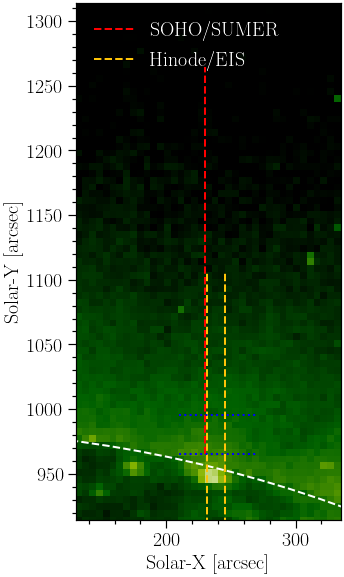

In [19]:
color_map = {171:plt.get_cmap("sohoeit171"),195:plt.get_cmap("sohoeit195"),
             284:plt.get_cmap("sohoeit284"),304:plt.get_cmap("sohoeit304")}

filename = "../save/eit_20071116_l1/eit_l1_20071116_072535.fits" 
sumer_ycen = 1119.81 - 5
sumer_xcen = 230.06
slit_color = {171:["red","#FFC408"],284:["red","#3A8FB7"],
              195:["red","#FFC408"],304:["white","#FFC408"]}
eis_ycen = 865.277 - 15
eis_xleft = 238.523 - 13.9776/2
eis_xright = 238.523 + 13.9776/2
with fits.open(filename) as hdul:
    #hdul.info()
    limb_circle = Circle((0,5),5.26*186.1,fill=False,edgecolor="white",lw=2,ls="--")
    eit_img = hdul[0].data
    wvl = hdul[0].header["WAVELNTH"]
    xstart = (1-hdul[0].header["CRPIX1"])*hdul[0].header["CDELT1"]
    xend = (hdul[0].header["NAXIS1"]-hdul[0].header["CRPIX1"])*hdul[0].header["CDELT1"]
    ystart = (1-hdul[0].header["CRPIX2"])*hdul[0].header["CDELT2"]
    yend = (hdul[0].header["NAXIS2"]-hdul[0].header["CRPIX2"])*hdul[0].header["CDELT2"]
    xcoord = np.linspace(xstart,xend,hdul[0].header["NAXIS1"])
    ycoord = np.linspace(ystart,yend,hdul[0].header["NAXIS2"])
    
    vmax = np.log10(np.percentile(eit_img,99.97))
    
    fig,ax = plt.subplots(figsize=(5,8),constrained_layout=True)
    # ax1 = plt.subplot2grid((1,3),(0,0),rowspan = 1,colspan = 2)
    # ax1.pcolormesh(xcoord,ycoord,np.log10(eit_img),cmap=color_map[wvl],
    #               vmax = vmax)
    # ax1.text(0.05,0.95,"EIT "+str(wvl)+r" \mbox{\AA}",fontsize=16,color="white",
    #         transform=ax1.transAxes,ha="left",va="center")
    # ax1.text(0.95,0.05,hdul[0].header["TIME-OBS"],fontsize=16,color="white",
    #         transform=ax1.transAxes,ha="right",va="center")
    
    # ax2 = plt.subplot2grid((1,3),(0,2),rowspan = 1,colspan = 1)
    zoomin_xpix_start = np.argmin(np.abs(xcoord-sumer_xcen+100))
    zoomin_xpix_end = np.argmin(np.abs(xcoord-sumer_xcen-100))
    zoomin_ypix_start = np.argmin(np.abs(ycoord-sumer_ycen+200))
    zoomin_ypix_end = np.argmin(np.abs(ycoord-sumer_ycen-200))
    
    # rec = patches.Rectangle((xcoord[zoomin_xpix_start],ycoord[zoomin_ypix_start]),
    #                        xcoord[zoomin_xpix_end]-xcoord[zoomin_xpix_start],
    #                        ycoord[zoomin_ypix_end]-ycoord[zoomin_ypix_start],
    #                        linewidth=2,edgecolor=slit_color[wvl][0],
    #                        facecolor="none")
    # ax1.add_patch(rec)
    
    ax.pcolormesh(xcoord[zoomin_xpix_start:zoomin_xpix_end+1],
                   ycoord[zoomin_ypix_start:zoomin_ypix_end+1],
                  np.log10(eit_img[zoomin_ypix_start:zoomin_ypix_end+1,
                                   zoomin_xpix_start:zoomin_xpix_end+1]),
                  cmap=color_map[wvl],vmax = vmax)
    
    ax.plot([sumer_xcen,sumer_xcen],[sumer_ycen-299.2/2.,sumer_ycen+299.2/2.],
             color=slit_color[wvl][0],ls="--",lw=2,label="SOHO/SUMER")
    
    ax.plot([eis_xleft,eis_xleft],[eis_ycen-512./2.,eis_ycen+512./2.],
             color=slit_color[wvl][1],ls="--",lw=2,label="Hinode/EIS")
    
    ax.plot([sumer_xcen-20,sumer_xcen+40],[sumer_ycen-299.2/2,sumer_ycen-299.2/2],color="blue",ls=":",lw=2)
    ax.plot([sumer_xcen-20,sumer_xcen+40],[sumer_ycen-299.2/2+30,sumer_ycen-299.2/2+30],color="blue",ls=":",lw=2)
    
    ax.plot([eis_xright,eis_xright],[eis_ycen-512./2.,eis_ycen+512./2.],
             color=slit_color[wvl][1],ls="--",lw=2)
    
    ax.add_artist(limb_circle)
    ax.legend(loc="upper left",frameon=False,fontsize=20,labelcolor="white")
    
    ax.axis("scaled")
    ax.set_xlabel("Solar-X [arcsec]",fontsize=20)
    ax.set_ylabel("Solar-Y [arcsec]",fontsize=20)
    ax.tick_params(labelsize=20,top=False,right=False,which="both")
    ax.tick_params(which="major",width=1.2,length=8,direction="out")
    ax.tick_params(which="minor",width=1.2,length=4,direction='out')
        
    ax.set_ylim(ycoord[zoomin_ypix_start],ycoord[zoomin_ypix_end])